<img src="https://beyondthestates.com/wp-content/uploads/2023/09/download.png" width=20% height=20%>

# Higher Diploma in Data Analytics course from [ATU](https://www.atu.ie/) in Winter 2024/25
##  Programming for Data Analytics - project 2024/2025
***



<div style="text-align:center">
<img src="img/Wind_turbines.jpg" width=60% height=80%>
<div style="text-align:center; font-size:10px;"><b>by stockertui @vecteezy.com </b>
</div>

### Project Overview 
***

In this project I need to demonstrate a data analysis of the wind speed in one of the Ireland's regions.
I will analyze 70 years of historical wind speed data from the Roches Point weather station in County Cork, Ireland. The data, sourced from the [Met Éireann historical dataset](https://www.met.ie/climate/available-data/historical-data), spans from January 1955 to December 2024, providing a comprehensive range for long-term trend analysis,  seasonal variations, and other patterns relevant to wind speed and energy production.

Roches Point Station is located at the southeastern tip of County Cork, near the entrance to Cork Harbour, a strategic coastal location that often experiences significant wind activity.
The station records meteorological data such as wind speed, temperature, and precipitation at hourly intervals, making it suitable for detailed analysis.
Its coastal location provides valuable insights into wind patterns influenced by the Atlantic Ocean, making it relevant for assessing wind energy potential in Ireland.

Here's what the dataset contains: 

- date:  -  Date and Time (utc)
- rain:  -  Precipitation Amount (mm)
- temp:  -  Air Temperature (C)
- wetb:  -  Wet Bulb Temperature (C)
- dewpt: -  Dew Point Temperature (C)
- vappr: -  Vapour Pressure (hPa)
- rhum:  -  Relative Humidity (%) 
- msl:   -  Mean Sea Level Pressure (hPa)
- wdsp:  -  Mean Wind Speed (kt)
- wddir: -  Predominant Wind Direction (deg)
- ind:   -  Indicator

To perform the analysis I will need data from `date`, and `wdsp`. 


### Project Goal
***

The primary goal of this project is to analyze wind speed data `wdsp` to assess its potential for wind energy generation and explore historical trends and patterns. By focusing on one location and utilizing this long-term dataset, I will address the following key questions:

- How do wind speeds vary seasonally and annually at Roches Point?
- Are there noticeable trends in wind speeds over the past 70 years?
- What is the potential wind energy output for this location based on historical data?
- Are there seasonal or extreme wind events that impact energy reliability?


To perform this analysis I will use [Python](https://en.wikipedia.org/wiki/Python_(programming_language) and its libraries: 

[Pandas](https://pandas.pydata.org/):
- Used to handle and preprocess the dataset (e.g., reading the CSV file, converting dates, grouping data).

[Matplotlib](https://matplotlib.org/):

- Used for creating plots to visualize trends and regression results.

[Scikit-Learn](https://scikit-learn.org/stable/index.html):

- Used to build and fit the linear regression model.

[NumPy](https://numpy.org/):

- Helps with numerical calculations.

### Importing the required Libraries
***


Let's import all necessary libraries that will be useful for my analysis and plotting. 

In [56]:
import pandas as pd

In [57]:
import numpy as np

In [58]:
import matplotlib.pyplot as plt

In [59]:
import seaborn as sns

### Loading, Cleaning and Inspecting the Data
***
The dataset will be loaded into a Python environment using the `pandas` library. After loading, the data will be inspected for its structure, including column names, data types, and missing values etc.

Our dataset is saved in .csv file in this repository. After inspecting this data by reviewing the file, I need to ignore first 17 rows as they contain description elements and they are not part of the dataset, therefore they can be ignored. 

In [60]:
df = pd.read_csv('data/hly1075.csv', skiprows=17, low_memory=False) # https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options
df.head(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir
0,01-dec-1955 01:00,0,0.0,0,10.7,0,10.0,9.4,11.8,91,1002.1,1,16,1,170
1,01-dec-1955 02:00,0,2.9,0,9.8,0,9.7,10.0,12.0,99,1001.8,1,11,1,190
2,01-dec-1955 03:00,0,3.8,0,9.7,0,9.5,9.4,11.7,97,1001.7,1,9,1,160


Let's check the the data type of each column

In [61]:
df.dtypes
print(df.dtypes)

date     object
ind       int64
rain     object
ind.1     int64
temp     object
ind.2     int64
wetb     object
dewpt    object
vappr    object
rhum     object
msl      object
ind.3     int64
wdsp     object
ind.4     int64
wddir    object
dtype: object


As we can see column `wdsp` is showing as objects which means it might have contains other values than a float. Let's check the NaN values: 

In [62]:
# Check for missing values
nan_values = df.isna()
print(nan_values)

         date    ind   rain  ind.1   temp  ind.2   wetb  dewpt  vappr   rhum  \
0       False  False  False  False  False  False  False  False  False  False   
1       False  False  False  False  False  False  False  False  False  False   
2       False  False  False  False  False  False  False  False  False  False   
3       False  False  False  False  False  False  False  False  False  False   
4       False  False  False  False  False  False  False  False  False  False   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
585546  False  False  False  False  False  False  False  False  False  False   
585547  False  False  False  False  False  False  False  False  False  False   
585548  False  False  False  False  False  False  False  False  False  False   
585549  False  False  False  False  False  False  False  False  False  False   
585550  False  False  False  False  False  False  False  False  False  False   

          msl  ind.3   wdsp  ind.4  wdd

In [63]:
# Count missing values
df.isnull().sum()
print(df.isnull().sum())

date     0
ind      0
rain     0
ind.1    0
temp     0
ind.2    0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
ind.3    0
wdsp     0
ind.4    0
wddir    0
dtype: int64


After using basic functions `df.isnull()` that shows True/False for missing values and `df.isnull().sum()` that shows total missing values per column, we can see that there is no missing/empty cells in this dataset. That would mean the cells that contain no data are not empty or zeroed, but they might contain a string placeholder for no-data cells. For more information you can look [here.](https://saturncloud.io/blog/how-to-check-if-a-particular-cell-in-pandas-dataframe-is-null/#:~:text=Checking%20for%20Null%20Values%20in%20Pandas%20DataFrame&text=To%20check%20for%20null%20values%20in%20a%20pandas%20DataFrame%2C%20we,cell%20is%20null%20or%20not.)

To find out, I will use the `unique()` function in Pandas. It is used to find all the distinct or unique values in a specific column. After running it, we can quickly understand the variety of values present in data, which in this case is a white space. For more information, you can look at documentation [here](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [64]:
# Get unique values in the Mean Wind Speed column
unique_wdsp = df['wdsp'].unique()

print(unique_wdsp)

['16' '11' '9' '5' '12' '15' '13' '14' '7' '4' '3' '6' '1' '0' '21' '19'
 '23' '22' '20' '8' '2' '17' '18' '10' '25' '29' '26' '24' '27' '28' '30'
 '31' '36' '32' '33' '34' '40' '41' '42' '38' '35' '46' '48' '44' '37'
 '39' '43' '47' '50' '53' '54' '45' '51' '55' '49' '52' '59' '56' ' ' '62'
 '60']


As we can see in the range of unique values, in both columns appears to be `' '` value, which is a white space. That is why our data type was shown as object. To be able to use this data for analysing, I need to clean this data. 
I will create a new dataset `cleandf`. It will replace white spaces with `NaN` and then drop them from my dataset. 



In [65]:
cleandf = df[['wddir', 'wdsp']].copy()  # Make a copy of the dataframe

# Replace spaces with NaN for both columns
cleandf['wdsp'] = cleandf['wdsp'].replace(' ', np.nan)
cleandf['wddir'] = cleandf['wddir'].replace(' ', np.nan)


# Drop rows with NaN in either 'wdsp' or 'wddir'
cleandf.dropna(subset=['wddir', 'wdsp'], inplace=True)

# Convert 'wdsp' and 'wddir' to float
cleandf['wdsp'] = cleandf['wdsp'].astype(float)
cleandf['wddir'] = cleandf['wddir'].astype(float)

Let's check in once again: 

In [66]:
# Check for missing values
nan_values = cleandf.isna()
print(nan_values)

        wddir   wdsp
0       False  False
1       False  False
2       False  False
3       False  False
4       False  False
...       ...    ...
585546  False  False
585547  False  False
585548  False  False
585549  False  False
585550  False  False

[584955 rows x 2 columns]


In [67]:
# Count missing values
cleandf.isnull().sum()
print(cleandf.isnull().sum())

wddir    0
wdsp     0
dtype: int64


Now let's the the data type: 

In [68]:
# Checking the data type of each column
cleandf.dtypes
print(cleandf.dtypes)

wddir    float64
wdsp     float64
dtype: object


After completing above steps we prepared and cleaned some data by handling missing values and data types. 

*** DateTime

Now, I need to focus on date and time values that are crucial for my data analysis. Let's see how the date and time is presented in this dataset. I need to look at my original data frame. 

In [69]:
df['date'].head()

0    01-dec-1955 01:00
1    01-dec-1955 02:00
2    01-dec-1955 03:00
3    01-dec-1955 04:00
4    01-dec-1955 05:00
Name: date, dtype: object

Date and time are stored together in single column, so it can limit the flexibility of my analysis. Splitting them into separate columns can allow me to use this data in more efficient way.  

To answer my first key question *How do wind speeds vary seasonally and annually at Roches Point?* I will first group the time by months, so I can analyse seasonal variations. 

In [70]:
# Converting the date column from string format ('DD-MMM-YYYY HH:MM') to datetime object
df['datetime'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M')

# Adding the 'datetime' column to the new dataframe 'cleandf'
cleandf['datetime'] = df['datetime']


# Extracting the month from the 'datetime' column
df['month'] = df['datetime'].dt.month


# Adding the 'month' column to new dataframe 'cleandf'
cleandf['month'] = df['month']

Now I want to verify that my new dataframe `cleandf` contains the necessary columns, including wind speed `wdsp` and the newly added month.

In [71]:
# checking the first few rows of the new dataframe
print(cleandf.head())

# Checking the columns of the new dataframe
print(cleandf.columns) 

   wddir  wdsp            datetime  month
0  170.0  16.0 1955-12-01 01:00:00     12
1  190.0  11.0 1955-12-01 02:00:00     12
2  160.0   9.0 1955-12-01 03:00:00     12
3  140.0   5.0 1955-12-01 04:00:00     12
4  330.0  12.0 1955-12-01 05:00:00     12
Index(['wddir', 'wdsp', 'datetime', 'month'], dtype='object')


The `datetime` module represents the numerical month, therefore December is represented as 12, January as 1, February as 2 and so on. I found this information in the documentation [here](https://docs.python.org/3/library/datetime.html).

Let's see the average wind speed for Roches Point for each month across our data:

In [72]:
# Grouping by month and calculating the mean wind speed
monthly_avg = cleandf.groupby('month')['wdsp'].mean()

# printing the monthly average wind speed
print(monthly_avg)

month
1     12.358806
2     12.133657
3     11.488303
4     10.378298
5      9.948699
6      9.345766
7      9.059754
8      9.310737
9      9.867759
10    11.096917
11    11.560873
12    12.518697
Name: wdsp, dtype: float64


To visualise the above trends, let's plot it using line plot. I will use `matplotlib.pyplot` library that I imported before. 
For better plotting I am using `monthly_avg.index` for x-axis (months) and `monthly_avg.values` for the y-axis (mean wind speeds). This ensures that each month is correctly paired with its corresponding mean wind speed. The `.index` represents the unique values of the `month` column (1 to 12) and the `.values` represents the corresponding mean wind speed `wdsp` for each month. I found this information at [askpython.com](https://www.askpython.com/python-modules/pandas/data-frame-index-for-x-axis) 

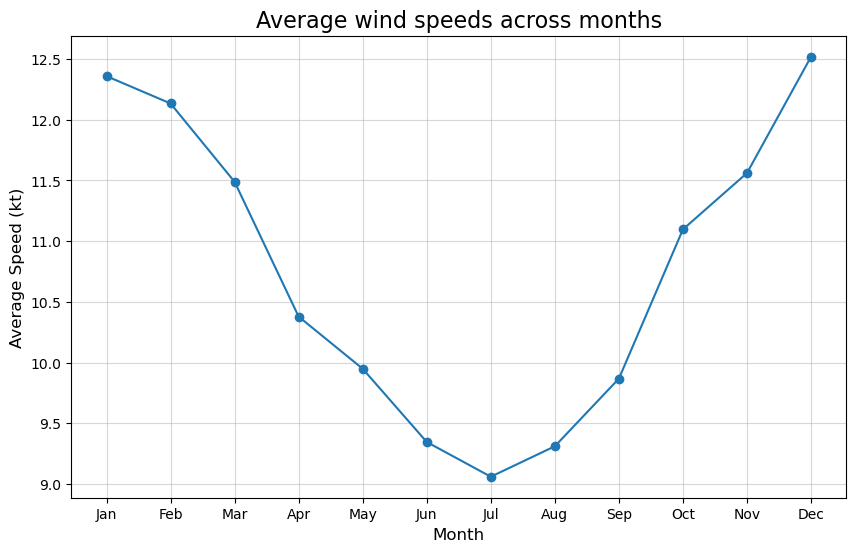

In [73]:
# Plotting the monthly average wind speed
plt.figure(figsize=(10, 6))

# line plot
plt.plot(monthly_avg.index, monthly_avg.values, marker='o')

# adding title and labels
plt.title('Average wind speeds across months', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Speed (kt)', fontsize=12)

# setting the x-axis labels to the month names
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# adding grid for better visibility
plt.grid(alpha=0.5)


Based on the plot, we can observe the following trends in average wind speeds across months:

1. Seasonal Variations
- Wind speed are highest in winter months with January and December the highest (December is showing the peak)
- Summer months have the lowest average wind speeds with July the lowest. 

2. Transition Periods
- Wind speeds decrease from January to July, reaching their lowest in mid-summer
- From August, wind speeds begin to increase, with a sharp rise during autumn (September to December).

3. Potential Insights:
- The data suggests a seasonal cycle where wind speeds peak during the colder months and dip during the warmer months.
- This information could be critical for planning wind energy projects, as energy output would vary seasonally, with higher potential in winter and lower output in summer.


Now, I would like to check how wind speeds vary annually at Roches Point. To do this, I need to create a new column in the data frame to store the year, then group the data by the year column and calculate the mean of the wind speed for each year. 

In [74]:
# Extracting the year from the datetime column
df['year'] = df['datetime'].dt.year

# Adding the year column to cleandf 
cleandf['year'] = df['year']

# Grouping by month and calculating the mean wind speed
annual_avg_original = cleandf.groupby('year')['wdsp'].mean()

# printing the monthly average wind speed
print(annual_avg)

year
1955    14.834455
1956    12.170879
1957    11.927626
1958    11.735217
1959    12.079509
          ...    
2020    13.123862
2021    11.782877
2022    12.417009
2023    12.360731
2024    12.333168
Name: wdsp, Length: 69, dtype: float64


To visualise the output of how wind speeds vary annually, I will create a line plot.

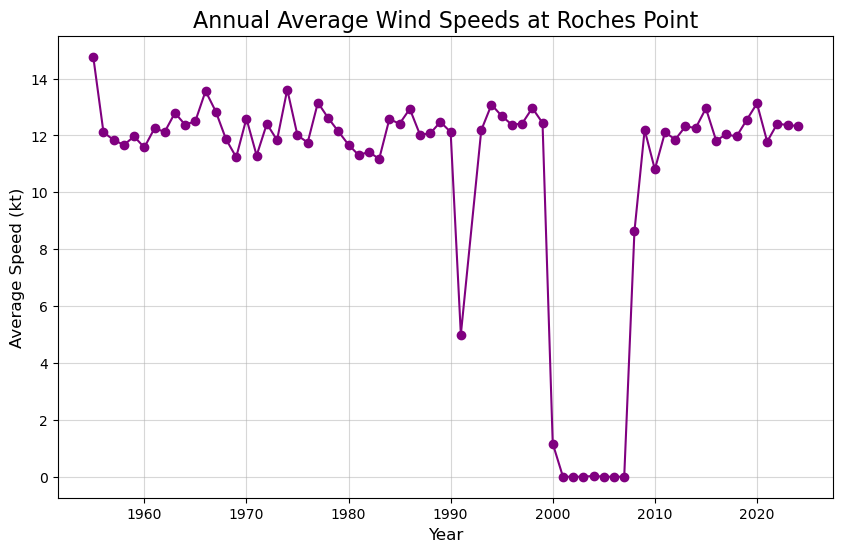

In [106]:
# Plotting the annual average wind speeds
plt.figure(figsize=(10, 6))

# line plot
plt.plot(annual_avg_original.index, annual_avg_original.values, marker='o', color='purple')

# adding labels, title and grid
plt.title('Annual Average Wind Speeds at Roches Point', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Speed (kt)', fontsize=12)
plt.grid(alpha=0.5)

While we can see the how average wind speeds are over time, we can notice a significant gap in wind speed data between 2000 and 2008 that might suggests missing values in my dataset for that period. Let's check it by reviewing few rows of the year 2000 to 2008. I will also include last few rows of 1999 and first few rows of 2009 to be sure that only between years 2000-2008 data is missing.  How to do it, I found the information [here](https://stackoverflow.com/questions/50088007/print-specific-rows-and-columns-in-pandas).  

In [76]:
# Select rows from the year 2000 and 2008
rows_1999_t = cleandf[cleandf['year'] == 1999].tail()  # Last few rows from 1999
rows_2000_h = cleandf[cleandf['year'] == 2000].head()  # First few rows from 2000
rows_2000_t = cleandf[cleandf['year'] == 2000].tail()  # Last few rows from 2000
rows_2007_h = cleandf[cleandf['year'] == 2007].head()  # First few rows from 2007
rows_2008_h = cleandf[cleandf['year'] == 2008].head()  # First few rows from 2008
rows_2008_t = cleandf[cleandf['year'] == 2008].tail()  # Last few rows from 2008

# Combine rows from 1999 and 2009
selected_rows = pd.concat([rows_1999_t,rows_2000_h,rows_2000_t,rows_2007_h,rows_2008_h,rows_2008_t]) # Merge data frames https://pandas.pydata.org/docs/reference/api/pandas.concat.html

# Print the selected rows
print(selected_rows)

        wddir  wdsp            datetime  month  year
368030  330.0  17.0 1999-12-31 19:00:00     12  1999
368031  330.0  14.0 1999-12-31 20:00:00     12  1999
368032  330.0   9.0 1999-12-31 21:00:00     12  1999
368033  310.0   3.0 1999-12-31 22:00:00     12  1999
368034  310.0   5.0 1999-12-31 23:00:00     12  1999
368035  290.0   1.0 2000-01-01 00:00:00      1  2000
368036  310.0   1.0 2000-01-01 01:00:00      1  2000
368037  340.0   3.0 2000-01-01 02:00:00      1  2000
368038  330.0   3.0 2000-01-01 03:00:00      1  2000
368039  340.0   6.0 2000-01-01 04:00:00      1  2000
376600    0.0   0.0 2000-12-31 19:00:00     12  2000
376601    0.0   0.0 2000-12-31 20:00:00     12  2000
376602    0.0   0.0 2000-12-31 21:00:00     12  2000
376603    0.0   0.0 2000-12-31 22:00:00     12  2000
376604    0.0   0.0 2000-12-31 23:00:00     12  2000
428592    0.0   0.0 2007-01-01 00:00:00      1  2007
428593    0.0   0.0 2007-01-01 01:00:00      1  2007
428594    0.0   0.0 2007-01-01 02:00:00      1

As we can see, there is no wind speed and no wind direction data for mid year 2000 to mid year 2008. To perform further analysis, I need to somehow handle this missing data. It is another type of missing data in this dataset (along with white spaces). There are few options of how to approach this issue:

1. Interpolate Missing Data - interpolation will fill in the missing values based on trends from other years. This works well if the missing period is small and the overall data is stable. See [askpython.com](https://www.askpython.com/python/examples/interpolation-to-fill-missing-entries)

2. Scikit-learn models- offers flexible and advanced imputation techniques, like KNN and regression-based methods, to handle missing values while considering relationships between features. See [scikit-learn.org](https://scikit-learn.org/stable/supervised_learning.html)

3. Drop the Missing Period Exclude the missing years from the analysis, but if the gap is too large or if interpolation might twist results.

The best approach depends on the importance of data accuracy for the analysis and the potential impact of missing data on the results. 




As wind speeds are typically seasonal and show smooth trends over time, let's try interpolation as this seem to be a reasonable approach for filling the missing years.

There are few interpolation techniques to estimate unknown data points between two known data points. In Python, Interpolation Formula is a technique mostly used to impute missing values in the data frame or series while preprocessing data. We can recognise the following techniques: 

- Nearest neighbor: assigns the value of the closest known data point to an unknown point.
- Linear Interpolation: estimates values by connecting two known points with a straight line and using the line to estimate the unknown value. 
- Polynomial Interpolation: fits a single polynomial of degree n-1 through n data points to estimate values for intermediate points.
- Time-based Interpolation: estimates values based on the temporal relationship between known data points, often used for time series data.

I learned about interpolation and its techniques at the website [analyticsvidhya.com](https://www.analyticsvidhya.com/blog/2021/06/power-of-interpolation-in-python-to-fill-missing-values/)

I would like to try using time-based interpolation, as I have a datetime index and wind speed values (wdsp) that change over time.

For better clearer data interpretation, I will replace now `0` with `NaN` values. A 0 wind speed might indicate calm weather but in this case, I will assume that indicates an error in the dataset. 

In [77]:

# knn_impute_df = pred_df.copy()
# simple_impute_df = pred_df.copy()
# iterative_impute_df = pred_df.copy()




In [78]:
pred_df = cleandf.copy()

# creating a copy of the dataframe
time_interp_df = pred_df.copy()

# Replace 0 values in the 'wdsp' column with NaN
time_interp_df['wdsp'] = time_interp_df['wdsp'].replace(0, np.nan)

# Filter rows with missing data between 2000 and 2008
missing_data = time_interp_df[time_interp_df['year'].between(2000, 2008)]

# Get rows with missing values in the 'wdsp' column
NaN_val = missing_data[missing_data['wdsp'].isna()]

# Print missing data information
print(NaN_val)

        wddir  wdsp            datetime  month  year
368045    0.0   NaN 2000-01-01 10:00:00      1  2000
368309    0.0   NaN 2000-01-12 10:00:00      1  2000
368311    0.0   NaN 2000-01-12 12:00:00      1  2000
368478    0.0   NaN 2000-01-19 11:00:00      1  2000
368780    0.0   NaN 2000-02-01 01:00:00      2  2000
...       ...   ...                 ...    ...   ...
439581    0.0   NaN 2008-04-06 23:00:00      4  2008
439582    0.0   NaN 2008-04-07 00:00:00      4  2008
443044  130.0   NaN 2008-08-29 06:00:00      8  2008
443738  180.0   NaN 2008-09-27 04:00:00      9  2008
443977  150.0   NaN 2008-10-07 03:00:00     10  2008

[70781 rows x 5 columns]


In [79]:
# Count missing values
time_interp_df.isnull().sum()
print(time_interp_df.isnull().sum())

wddir           0
wdsp        80272
datetime        0
month           0
year            0
dtype: int64


In [80]:
# check the number of missing values in the 'wdsp' column before interpolation

print("Before interpolation:")
print(time_interp_df['wdsp'].isna().sum())


Before interpolation:
80272


In [81]:
# print("number on NaN values before :")
# print(time_interp_df['wdsp'].isna().sum())

# Set the 'datetime' column as the index
# time_interp_df.set_index('datetime', inplace=True)


# time_interp_df = time_interp_df.reset_index()

In [82]:
# Set the 'datetime' column as the index
time_interp_df.set_index('datetime', inplace=True)

# Replace all NaN values in the 'wdsp' column with interpolated values
time_interp_df['wdsp'] = time_interp_df['wdsp'].interpolate(method='time')





In [83]:
print(time_interp_df.head())

                     wddir  wdsp  month  year
datetime                                     
1955-12-01 01:00:00  170.0  16.0     12  1955
1955-12-01 02:00:00  190.0  11.0     12  1955
1955-12-01 03:00:00  160.0   9.0     12  1955
1955-12-01 04:00:00  140.0   5.0     12  1955
1955-12-01 05:00:00  330.0  12.0     12  1955


In [84]:
time_interp_df.dtypes
print(time_interp_df.dtypes)

wddir    float64
wdsp     float64
month      int32
year       int32
dtype: object


In [85]:
time_interp_df = time_interp_df.reset_index()

In [86]:
time_interp_df.dtypes
print(time_interp_df.dtypes)

datetime    datetime64[ns]
wddir              float64
wdsp               float64
month                int32
year                 int32
dtype: object


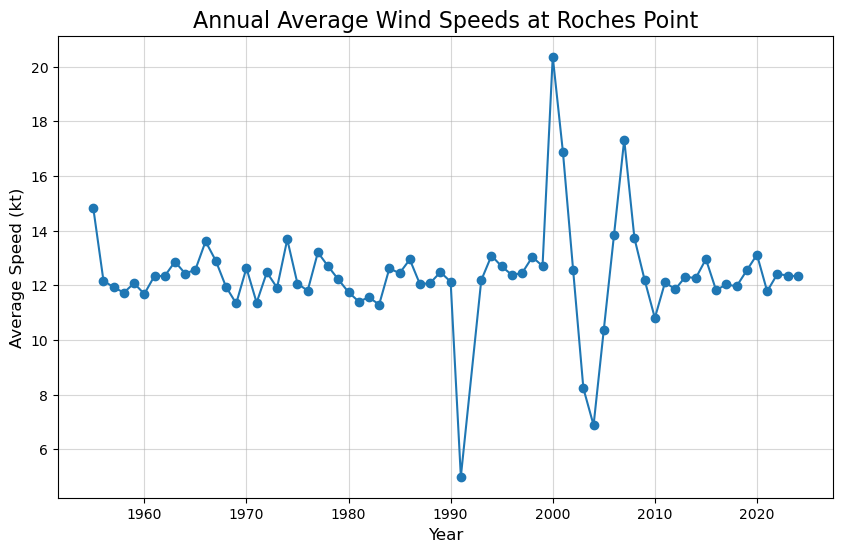

In [87]:
# Extract the year from the datetime column
time_interp_df['year'] = time_interp_df['datetime'].dt.year 

# Group by year and calculate the mean wind speed
annual_avg = time_interp_df.groupby('year')['wdsp'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(annual_avg.index, annual_avg.values, marker='o', label='Annual Average Wind Speeds')

# Add labels, title, and grid
plt.title('Annual Average Wind Speeds at Roches Point', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Speed (kt)', fontsize=12)
plt.grid(alpha=0.5)

The above plot indicates that the interpolation may not have properly captured the variations in wind speeds between 2000 and 2008, as they show extreme deviations comparing to the previous and later years. This might be because gaps takes months, so the interpolated values may not reflect reality. Let's check another technique - Scikit-learn. 

Options in scikit-learn

-  [Simple Imputer](https://scikit-learn.org/1.5/modules/generated/sklearn.impute.SimpleImputer.html): can replace missing values with the below numbers, however, it does not account for time relationships or other features:
    - Mean
    - Median
    - Most Frequent Value
    - Constant Value

- [K-Nearest Neighbors (KNN) Imputer](https://scikit-learn.org/1.5/modules/generated/sklearn.impute.KNNImputer.html) - estimates missing values based on the nearest neighbors in the dataset.
- [Regression-Based Imputation](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html) - regression models (e.g., Linear Regression, Random Forest) can predict and fill gaps based on other features.

- Single Imputer
- Iterative Imputer


To decide which technique I use, I will check if there is significant correlation between any wind speed `wdsp` and any column in my dataset. 

To do this, I need to clean the data from the other columns.

In [88]:
# create a new dataframe without the date columns for correlation
corr_df = df.drop(columns=['date','datetime','month', 'year']).copy()

# Replace spaces with NaN for the columns
corr_df = corr_df.replace(' ', np.nan)

# Drop rows with NaN 
corr_df.dropna(inplace=True)

# Check for remaining NaN values (should return 0 for all columns)
print(corr_df.isna().sum())


ind      0
rain     0
ind.1    0
temp     0
ind.2    0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
ind.3    0
wdsp     0
ind.4    0
wddir    0
dtype: int64


In [89]:
# Calculate the correlation matrix
corr = corr_df.corr()
print(corr)

            ind      rain     ind.1      temp     ind.2      wetb     dewpt  \
ind    1.000000 -0.085098  0.055718 -0.153828  0.050113 -0.111578 -0.057856   
rain  -0.085098  1.000000 -0.006799 -0.003579 -0.009071  0.041069  0.082260   
ind.1  0.055718 -0.006799  1.000000 -0.121586  0.543850 -0.121378 -0.114010   
temp  -0.153828 -0.003579 -0.121586  1.000000 -0.138218  0.972395  0.886624   
ind.2  0.050113 -0.009071  0.543850 -0.138218  1.000000 -0.141956 -0.140426   
wetb  -0.111578  0.041069 -0.121378  0.972395 -0.141956  1.000000  0.967653   
dewpt -0.057856  0.082260 -0.114010  0.886624 -0.140426  0.967653  1.000000   
vappr -0.051213  0.079368 -0.085499  0.869961 -0.105462  0.950654  0.973781   
rhum   0.182193  0.190462 -0.011134 -0.028124 -0.035980  0.192063  0.409047   
msl    0.011913 -0.200920  0.006708  0.085727  0.014575  0.051909  0.012937   
ind.3 -0.118294  0.039515 -0.014258  0.036915  0.012791  0.032373  0.022879   
wdsp  -0.021490  0.189123  0.000075 -0.030786  0.007

Let's visualise that: 

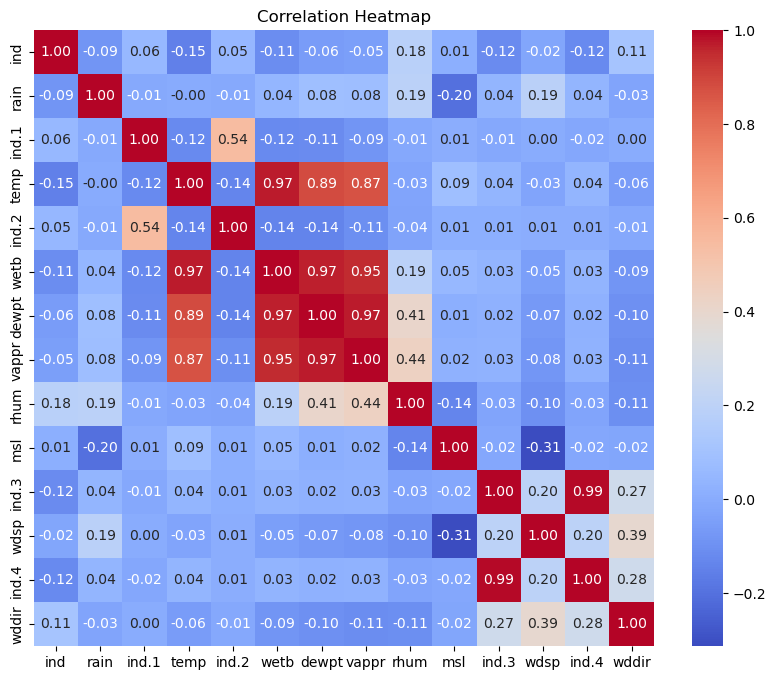

In [90]:
# creating a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f") # https://seaborn.pydata.org/generated/seaborn.heatmap.html fmt=".2f" to display values with 2 decimal places
plt.title("Correlation Heatmap")
plt.show()

In [91]:
print(corr_df.corr()['wdsp'])

ind     -0.021490
rain     0.189123
ind.1    0.000075
temp    -0.030786
ind.2    0.007773
wetb    -0.051491
dewpt   -0.072416
vappr   -0.079084
rhum    -0.099759
msl     -0.313625
ind.3    0.198123
wdsp     1.000000
ind.4    0.199246
wddir    0.392360
Name: wdsp, dtype: float64


In [92]:
strong_corr = corr_df.corr()['wdsp'][(corr_df.corr()['wdsp'] > 0.5) | (corr_df.corr()['wdsp'] < -0.5)]
print(strong_corr)

wdsp    1.0
Name: wdsp, dtype: float64


Let's use K-Nearest Neighbors (KNN) Imputer. I want to include specific time-related components from a `datetime` column in the `cleandf` that will be needed for my imputation

In [93]:
cleandf['hour'] = cleandf['datetime'].dt.hour
cleandf['day'] = cleandf['datetime'].dt.day
cleandf['month'] = cleandf['datetime'].dt.month
cleandf['year'] = cleandf['datetime'].dt.year

In [94]:
knn_impute_df = pred_df.copy()

knn_impute_df['wdsp'] = knn_impute_df['wdsp'].replace(0, np.nan)

print("number on NaN values before :")
print(knn_impute_df['wdsp'].isna().sum())

# Set the 'datetime' column as the index
# knn_impute_df.set_index('datetime', inplace=True)


# time_interp_df = time_interp_df.reset_index()

number on NaN values before :
80272


In [95]:



from sklearn.impute import KNNImputer



# Replace 0 values in the 'wdsp' column with NaN


knn_impute_df['hour'] = knn_impute_df['datetime'].dt.hour
knn_impute_df['day'] = knn_impute_df['datetime'].dt.day
knn_impute_df['month'] = knn_impute_df['datetime'].dt.month
knn_impute_df['year'] = knn_impute_df['datetime'].dt.year

# Randomly sample 10% of the data - as the dataset is large
sampled_data_knn = knn_impute_df.sample(frac=0.1, random_state=42)  

# Selecting relevant columns for imputation
columns_to_impute_knn = ['wdsp', 'wddir','hour', 'day', 'month', 'year']

# Apply KNN Imputer to the sampled dataset
imputer = KNNImputer(n_neighbors=5, weights="uniform")
sampled_imputed_data_knn = imputer.fit_transform(sampled_data_knn[columns_to_impute_knn])

# Update the sampled DataFrame with the imputed values
sampled_data_knn[columns_to_impute_knn] = sampled_imputed_data_knn

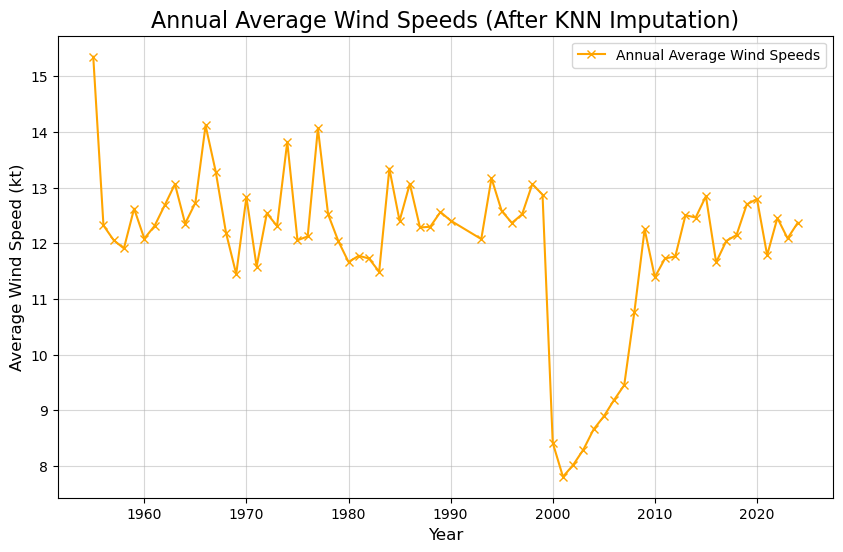

In [96]:

# Group by 'year' and calculate the average wind speed
annual_avg_knn = sampled_data_knn.groupby('year')['wdsp'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(annual_avg_knn.index, annual_avg_knn.values, marker='x', label='Annual Average Wind Speeds', color='orange')

# Add labels, title, and grid
plt.title('Annual Average Wind Speeds (After KNN Imputation)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Wind Speed (kt)', fontsize=12)
plt.grid(alpha=0.5)
plt.legend()

In [97]:
simple_impute_df = pred_df.copy()

simple_impute_df['wdsp'] = simple_impute_df['wdsp'].replace(0, np.nan)

print("number on NaN values before :")
print(simple_impute_df['wdsp'].isna().sum())

number on NaN values before :
80272


In [98]:
# simple imputer
from sklearn.impute import SimpleImputer

simple_impute_df['hour'] = simple_impute_df['datetime'].dt.hour
simple_impute_df['day'] = simple_impute_df['datetime'].dt.day
simple_impute_df['month'] = simple_impute_df['datetime'].dt.month
simple_impute_df['year'] = simple_impute_df['datetime'].dt.year

# Randomly sample 30% of the data - as the dataset is large
sampled_data_si= simple_impute_df.sample(frac=0.3, random_state=42)

# Selecting relevant columns for imputation
columns_to_impute_si = ['wdsp', 'wddir', 'hour', 'day', 'month', 'year']

# Initialize SimpleImputer with the desired strategy
simple_imputer_si = SimpleImputer(strategy='most_frequent')  # Options: 'mean', 'median', 'most_frequent', 'constant'

# Apply Simple Imputer to the sampled dataset
sampled_imputed_data_si = simple_imputer_si.fit_transform(sampled_data_si[columns_to_impute_si])

# Update the sampled DataFrame with the imputed values
sampled_data_si[columns_to_impute_si] = sampled_imputed_data_si

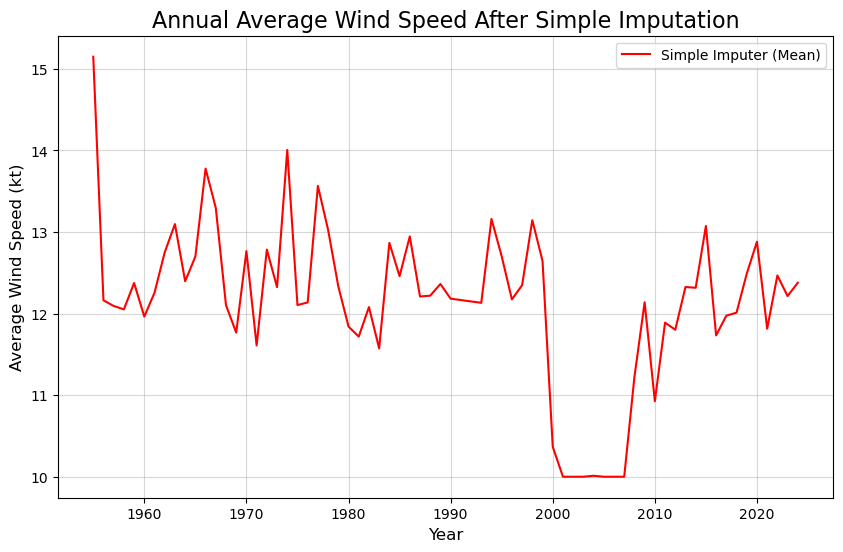

In [99]:
# Step 2: Group by year and calculate annual averages for 'wdsp'
annual_avg_si = sampled_data_si.groupby('year')['wdsp'].mean()

# Step 3: Plot the results
plt.figure(figsize=(10, 6))

# Line plot of annual average wind speed
plt.plot(annual_avg_si.index, annual_avg_si.values, label='Simple Imputer (Mean)', color='red')

# Add labels, title, and grid
plt.title('Annual Average Wind Speed After Simple Imputation', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Wind Speed (kt)', fontsize=12)
plt.legend()
plt.grid(alpha=0.5)



In [100]:
iterative_impute_df = pred_df.copy()

iterative_impute_df['wdsp'] = iterative_impute_df['wdsp'].replace(0, np.nan)

print("number on NaN values before :")
print(iterative_impute_df['wdsp'].isna().sum())

number on NaN values before :
80272


In [101]:
from sklearn.experimental import enable_iterative_imputer  # Enable IterativeImputer
from sklearn.impute import IterativeImputer


iterative_impute_df['hour'] = iterative_impute_df['datetime'].dt.hour
iterative_impute_df['day'] = iterative_impute_df['datetime'].dt.day
iterative_impute_df['month'] = iterative_impute_df['datetime'].dt.month
iterative_impute_df['year'] = iterative_impute_df['datetime'].dt.year

# Randomly sample 30% of the data - as the dataset is large
sampled_data_ii = iterative_impute_df.sample(frac=0.3, random_state=42)

# Selecting relevant columns for imputation
columns_to_impute_ii = ['wdsp', 'wddir', 'hour', 'day', 'month', 'year']

# Initialize IterativeImputer with desired parameters
iterative_imputer_ii = IterativeImputer(max_iter=10, random_state=42)

# Apply Iterative Imputer to the sampled dataset
sampled_imputed_data_ii = iterative_imputer_ii.fit_transform(sampled_data_ii[columns_to_impute_ii])

# Update the sampled DataFrame with the imputed values
sampled_data_ii[columns_to_impute_ii] = sampled_imputed_data_ii

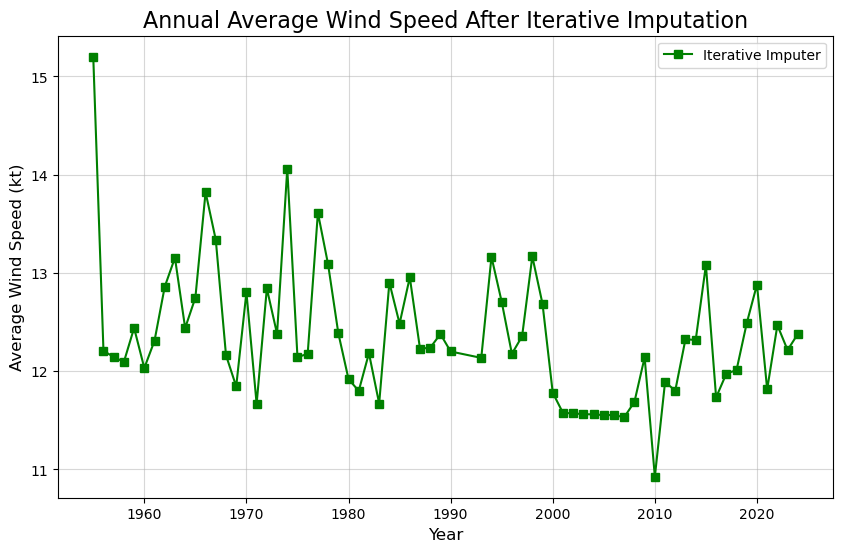

In [102]:
annual_avg_ii = sampled_data_ii.groupby('year')['wdsp'].mean()

# Step 3: Plot the results
plt.figure(figsize=(10, 6))

# Plot Iterative Imputer results
plt.plot(annual_avg_ii.index, annual_avg_ii.values, marker='s', label='Iterative Imputer', color='green')


# Add labels, title, and grid
plt.title('Annual Average Wind Speed After Iterative Imputation', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Wind Speed (kt)', fontsize=12)
plt.legend()
plt.grid(alpha=0.5)

We can observe that KNN Imputation filled the missing data, but the significant fluctuations are also visible in the filled years. Let's compare both plots. 

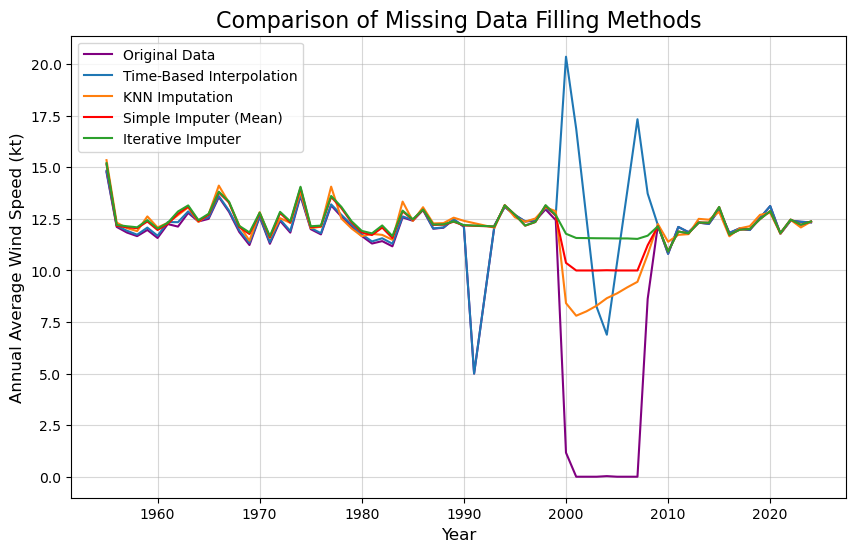

In [105]:
plt.figure(figsize=(10, 6))


plt.plot(annual_avg_original.index, annual_avg_original.values, label='Original Data', color='purple')

# Plot time-based interpolation results
plt.plot(annual_avg.index, annual_avg.values, label='Time-Based Interpolation')

# Plot KNN imputation results
plt.plot(annual_avg_knn.index, annual_avg_knn.values, label='KNN Imputation')

# Line plot of annual average wind speed
plt.plot(annual_avg_si.index, annual_avg_si.values, label='Simple Imputer (Mean)', color='red')


# Plot Iterative Imputer results
plt.plot(annual_avg_ii.index, annual_avg_ii.values, label='Iterative Imputer')

# Add labels, legend, and title
plt.title('Comparison of Missing Data Filling Methods', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Annual Average Wind Speed (kt)', fontsize=12)
plt.legend()
plt.grid(alpha=0.5)


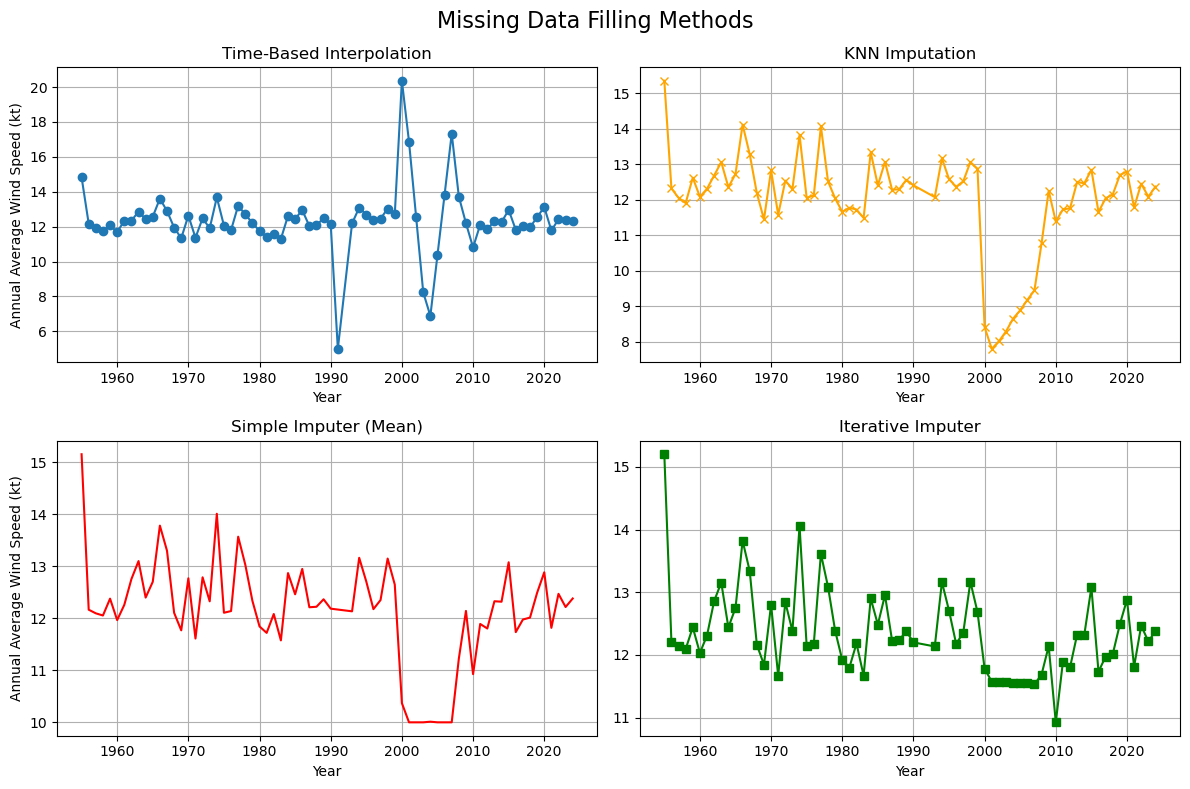

In [ ]:

import matplotlib.pyplot as plt

# Set up a figure with multiple subplots (2x2 grid)
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# set up the title
fig.suptitle('Missing Data Filling Methods', fontsize=16)


# Plot each imputation method in a separate subplot
axs[0, 0].plot(annual_avg.index, annual_avg.values, marker='o', label='Time-Based Interpolation')
axs[0, 0].set_title('Time-Based Interpolation')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Annual Average Wind Speed (kt)')
axs[0, 0].grid(True)

axs[0, 1].plot(annual_avg_knn.index, annual_avg_knn.values, marker='x', label='KNN Imputation', color='orange')
axs[0, 1].set_title('KNN Imputation')
axs[0, 1].set_xlabel('Year')
axs[0, 1].grid(True)

axs[1, 0].plot(annual_avg_si.index, annual_avg_si.values, label='Simple Imputer (Mean)', color='red')
axs[1, 0].set_title('Simple Imputer (Mean)')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Annual Average Wind Speed (kt)')
axs[1, 0].grid(True)

axs[1, 1].plot(annual_avg_ii.index, annual_avg_ii.values, marker='s', label='Iterative Imputer', color='green')
axs[1, 1].set_title('Iterative Imputer')
axs[1, 1].set_xlabel('Year')
axs[1, 1].grid(True)



# Adjust layout for better spacing
plt.tight_layout()
plt.show()


## References:
***


https://docs.python.org/3/library/datetime.html

https://www.askpython.com/python-modules/pandas/data-frame-index-for-x-axis

https://stackoverflow.com/questions/50088007/print-specific-rows-and-columns-in-pandas

https://pandas.pydata.org/docs/reference/api/pandas.concat.html